In [1]:
from HDF.HDFData import HDFArray
import matplotlib.pyplot as plt
import peakdetect as pkd
import os.path
import math
from Analyzer import *
path = './FilteredData/'
count_files = 85

In [2]:
#Найдем минимальную длину интервала, которая подойдет для точного прогнозирования данных
file = FileAnalyzer(path + '0.h5')
length_min_interval = file.get_min_length_intervals()
length_min_intervals_from_files = []
for i in range(1, count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    length_min_intervals_from_files.append(min_length)
    print('file = ', filename, ' with min length interval = ', min_length)
    if file.get_min_length_intervals() < length_min_interval:
        length_min_interval = file.get_min_length_intervals()
print('Min length interval = ', length_min_interval)

file =  ./FilteredData/1.h5  with min length interval =  80
file =  ./FilteredData/2.h5  with min length interval =  47
file =  ./FilteredData/3.h5  with min length interval =  37
file =  ./FilteredData/4.h5  with min length interval =  90
file =  ./FilteredData/5.h5  with min length interval =  68
file =  ./FilteredData/6.h5  with min length interval =  58
file =  ./FilteredData/7.h5  with min length interval =  62
file =  ./FilteredData/8.h5  with min length interval =  65
file =  ./FilteredData/9.h5  with min length interval =  148
file =  ./FilteredData/10.h5  with min length interval =  131
file =  ./FilteredData/11.h5  with min length interval =  49
file =  ./FilteredData/12.h5  with min length interval =  35
file =  ./FilteredData/13.h5  with min length interval =  64
file =  ./FilteredData/14.h5  with min length interval =  54
file =  ./FilteredData/15.h5  with min length interval =  42
file =  ./FilteredData/16.h5  with min length interval =  48
file =  ./FilteredData/17.h5  w

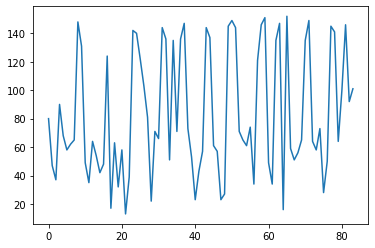

In [3]:
plt.plot(length_min_intervals_from_files)
#График минимальных длин интервалов из полученных файлов
#

In [4]:
average_series = sum(length_min_intervals_from_files)/count_files
print('Среднее полученного ряда: ', average_series)

Среднее полученного ряда:  81.88235294117646


In [5]:
count = 0
for i in range(count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    if min_length > average_series:
        count+=1
print('count files = ', count)
#Получили 33 файла из 85, что не очень положительно влияет на обучающую выборку
#Попробуем взять медиану ряда

ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
count files =  33


In [6]:
median_of_series = sorted(length_min_intervals_from_files)[42] # Взяли медиану ряда
print('Медиана полученного ряда: ', median_of_series)

Медиана полученного ряда:  66


In [7]:
count = 0
good_files = []
for i in range(count_files):
    filename = path + str(i) + '.h5'
    file = FileAnalyzer(filename)
    min_length = file.get_min_length_intervals()
    if min_length > median_of_series:
        good_files.append(str(i)+'.h5')
print('Count good files = ', len(good_files))
#Здесь уже видим, что нам подходят 42 файла с минимальной длинной интервала 66.
#Также три файла говорят о некорректности данных, хранящихся в них.

ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
Count good files =  42


In [8]:
print(good_files)

['0.h5', '1.h5', '4.h5', '5.h5', '9.h5', '10.h5', '17.h5', '24.h5', '25.h5', '26.h5', '27.h5', '28.h5', '30.h5', '32.h5', '33.h5', '35.h5', '36.h5', '37.h5', '38.h5', '39.h5', '44.h5', '45.h5', '50.h5', '51.h5', '52.h5', '53.h5', '56.h5', '58.h5', '59.h5', '60.h5', '63.h5', '64.h5', '66.h5', '71.h5', '72.h5', '75.h5', '78.h5', '79.h5', '81.h5', '82.h5', '83.h5', '84.h5']


In [9]:
count_all_intervals = 0
for filename in good_files:
    file = FileAnalyzer(path + filename)
    count_all_intervals += len(file.get_intervals())
print('Всего интервалов во всех подходящих файлах: ', count_all_intervals)

ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
ERROR len track =  1  len interval =  10000000000.0
Всего интервалов во всех подходящих файлах:  5873


In [10]:
print('80% = ', count_all_intervals * 0.8)
print('20% = ', count_all_intervals * 0.2)
#Имеем неплохое количество данных для обучения в виде интервалов

80% =  4698.400000000001
20% =  1174.6000000000001


In [11]:
id_file = 0
for filename in good_files:
    file = FileAnalyzer(path + filename)
    count_intervals = len(file.get_intervals())
    id_begin_interval = count_intervals * id_file
    id_file += 1
    file.trim_intervals_and_save(id_begin_interval, 66)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'